In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/碩一下/Machine Learning/Homework_5') 
os.listdir() 

['leaf-classification', 'answer.csv', 'catboost_info', 'Kaggle_5.ipynb']

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC


In [5]:
train_data = pd.read_csv("/content/drive/MyDrive/碩一下/Machine Learning/Homework_5/leaf-classification/train.csv.zip")
train_data.head(2)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.0,0.029297,0.0,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.0,0.015625,0.000000,0.031250,0.000000,0.013672,0.029297,0.015625,0.011719,0.003906,0.025391,0.0,0.001953,0.011719,0.009766,0.041016,...,0.008789,0.015625,0.044922,0.000000,0.037109,0.012695,0.02832,0.0,0.019531,0.026367,0.005859,0.0,0.004883,0.016602,0.034180,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.0,0.0,0.006836,0.037109,0.007812,0.0,0.00293,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.0,0.033203,0.0,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.0,0.000000,0.007812,0.027344,0.003906,0.037109,0.007812,0.048828,0.054688,0.027344,0.003906,0.0,0.000000,0.003906,0.013672,0.033203,...,0.050781,0.001953,0.021484,0.003906,0.027344,0.023438,0.06250,0.0,0.038086,0.000000,0.019531,0.0,0.001953,0.003906,0.015625,0.004883,0.104490,0.000000,0.061523,0.007812,0.008789,0.013672,0.011719,0.001953,0.035156,0.007812,0.0,0.0,0.053711,0.036133,0.000977,0.0,0.00000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461


In [6]:
test_data = pd.read_csv("/content/drive/MyDrive/碩一下/Machine Learning/Homework_5/leaf-classification/test.csv.zip")
test_data.head(2)

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,0.023438,0.005859,0.021484,0.076172,0.001953,0.035156,0.0,0.001953,0.021484,0.001953,0.015625,0.009766,0.000000,0.0,0.005859,0.007812,0.015625,0.000000,0.017578,0.029297,0.021484,0.001953,0.003906,0.025391,0.0,0.013672,0.005859,0.042969,0.064453,0.031250,...,0.004883,0.00000,0.013672,0.001953,0.045898,0.024414,0.045898,0.0,0.0,0.070312,0.011719,0.0,0.0,0.054688,0.024414,0.026367,0.000000,0.000977,0.010742,0.020508,0.013672,0.034180,0.025391,0.0,0.014648,0.018555,0.0,0.0,0.0,0.015625,0.006836,0.0,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,0.023438,0.009766,0.019531,0.039062,0.027344,0.017578,0.0,0.017578,0.015625,0.009766,0.009766,0.042969,0.007812,0.0,0.003906,0.005859,0.011719,0.007812,0.009766,0.037109,0.013672,0.005859,0.003906,0.019531,0.0,0.005859,0.029297,0.019531,0.041016,0.005859,...,0.001953,0.00293,0.051758,0.001953,0.016602,0.010742,0.044922,0.0,0.0,0.033203,0.013672,0.0,0.0,0.031250,0.058594,0.041016,0.012695,0.005859,0.021484,0.047852,0.030273,0.009766,0.041992,0.0,0.007812,0.004883,0.0,0.0,0.0,0.049805,0.000000,0.0,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922


In [7]:
# 看看有哪些不同的columns
def differentcolumns(traincols, testcols):
    for i in traincols:
        if i not in testcols:
            print(i)
differentcolumns(train_data.columns, test_data.columns)

species


In [8]:
# target = train_data["species"]
train_data.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,0.018639,0.024209,0.011975,0.041252,0.008053,0.015609,0.000110,0.015128,0.020107,0.012344,0.013135,0.019131,0.006195,0.000998,0.007647,0.008854,0.018718,0.005628,0.015534,0.028261,0.016501,0.010843,0.009691,0.019502,0.001083,0.013167,0.018042,0.016268,0.031061,0.014846,...,0.010437,0.023274,0.020317,0.010097,0.021722,0.011675,0.023895,0.006048,0.023243,0.026518,0.010514,0.003321,0.021123,0.023964,0.017060,0.019187,0.015580,0.005895,0.013875,0.025263,0.016227,0.021760,0.018595,0.016763,0.011680,0.018986,0.013240,0.007289,0.014469,0.022091,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,0.016071,0.026086,0.011732,0.046341,0.013273,0.014277,0.001052,0.010821,0.021285,0.014479,0.009672,0.019463,0.010203,0.004310,0.012864,0.012724,0.012313,0.010857,0.014100,0.022852,0.016560,0.016563,0.019291,0.016000,0.002088,0.013218,0.016464,0.011484,0.023270,0.013242,...,0.016252,0.041760,0.031532,0.018188,0.026749,0.012933,0.027225,0.015114,0.058630,0.042266,0.011852,0.012740,0.058368,0.027909,0.021796,0.025500,0.041012,0.010653,0.018022,0.046437,0.021087,0.026324,0.016007,0.029841,0.013163,0.027361,0.033402,0.013862,0.021654,0.027335,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,0.005859,0.003906,0.001953,0.007812,0.000000,0.001953,0.000000,0.005859,0.0

In [9]:
train_data.isnull().any()

id           False
species      False
margin1      False
margin2      False
margin3      False
             ...  
texture60    False
texture61    False
texture62    False
texture63    False
texture64    False
Length: 194, dtype: bool

In [10]:
test_data.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,780.673401,0.017562,0.028425,0.031858,0.022556,0.014527,0.037497,0.019222,0.001085,0.007092,0.018798,0.024329,0.012281,0.041575,0.007276,0.015760,0.000233,0.014915,0.020728,0.012978,0.013369,0.018837,0.006211,0.001121,0.007237,0.009180,0.018301,0.005570,0.015306,0.028675,0.015947,0.011189,0.010029,0.019515,0.001210,0.014053,0.017719,0.015770,0.030757,0.015194,...,0.010706,0.024222,0.022726,0.010126,0.020580,0.011438,0.023998,0.006399,0.020756,0.026130,0.010593,0.003439,0.021085,0.022900,0.017692,0.019497,0.016330,0.006491,0.014732,0.026875,0.016713,0.022006,0.018865,0.016237,0.011859,0.019454,0.013614,0.006986,0.014303,0.023133,0.035291,0.005923,0.015033,0.011762,0.015881,0.011217,0.002617,0.019975,0.009389,0.020970
std,465.646977,0.019585,0.038351,0.025719,0.028797,0.018029,0.051372,0.017122,0.002697,0.009515,0.016229,0.025912,0.012206,0.046846,0.011913,0.014536,0.002049,0.010909,0.024973,0.013683,0.010404,0.018697,0.010414,0.004704,0.011863,0.012634,0.011687,0.011151,0.013870,0.023262,0.015951,0.016753,0.019178,0.015968,0.002569,0.014258,0.015669,0.011060,0.022979,0.013585,...,0.015606,0.042419,0.033110,0.019861,0.024978,0.012094,0.028509,0.016080,0.053624,0.042201,0.012020,0.012498,0.060279,0.025926,0.021096,0.026146,0.039864,0.011890,0.018287,0.043090,0.022562,0.026686,0.016392,0.030605,0.014024,0.029977,0.032689,0.013194,0.020460,0.029365,0.064482,0.026934,0.022318,0.024771,0.014898,0.052530,0.011204,0.034704,0.013457,0.023407
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,368.500000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,0.005859,0.003906,0.001953,0.009766,0.000000,0.001953,0.000000,0.005859,0.0

In [11]:
train_data.isnull().any()

id           False
species      False
margin1      False
margin2      False
margin3      False
             ...  
texture60    False
texture61    False
texture62    False
texture63    False
texture64    False
Length: 194, dtype: bool

In [12]:
target = train_data["species"]
target.value_counts()

Betula_Austrosinensis    10
Quercus_Imbricaria       10
Castanea_Sativa          10
Alnus_Cordata            10
Magnolia_Salicifolia     10
                         ..
Tilia_Tomentosa          10
Prunus_X_Shmittii        10
Quercus_Suber            10
Quercus_Brantii          10
Quercus_Chrysolepis      10
Name: species, Length: 99, dtype: int64

In [13]:
encoder = LabelEncoder()
label = encoder.fit_transform(target)

In [14]:
train = train_data.drop(['id','species'],axis=1)

In [15]:
test_id=test_data["id"]
test_data=test_data.drop(['id'],axis=1)

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(train,label,test_size=0.15,random_state=13)

In [37]:
# model & 參數選擇
svm_model = SVC(kernel='rbf', class_weight='balanced',probability=True)

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }

grid_search = GridSearchCV(estimator=svm_model,param_grid=param_grid, verbose=10,cv=10)
grid_search.fit(X_train,Y_train)

print("best params:{}".format(grid_search.best_params_, grid_search.best_score_))
final_model = grid_search.best_estimator_

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] C=1000.0, gamma=0.0001 ..........................................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. C=1000.0, gamma=0.0001, score=0.329, total=   2.4s
[CV] C=1000.0, gamma=0.0001 ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV] .............. C=1000.0, gamma=0.0001, score=0.238, total=   2.4s
[CV] C=1000.0, gamma=0.0001 ..........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


[CV] .............. C=1000.0, gamma=0.0001, score=0.214, total=   2.3s
[CV] C=1000.0, gamma=0.0001 ..........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.1s remaining:    0.0s


[CV] .............. C=1000.0, gamma=0.0001, score=0.202, total=   2.4s
[CV] C=1000.0, gamma=0.0001 ..........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.4s remaining:    0.0s


[CV] .............. C=1000.0, gamma=0.0001, score=0.167, total=   2.4s
[CV] C=1000.0, gamma=0.0001 ..........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.8s remaining:    0.0s


[CV] .............. C=1000.0, gamma=0.0001, score=0.179, total=   2.4s
[CV] C=1000.0, gamma=0.0001 ..........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   14.2s remaining:    0.0s


[CV] .............. C=1000.0, gamma=0.0001, score=0.190, total=   2.4s
[CV] C=1000.0, gamma=0.0001 ..........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   16.5s remaining:    0.0s


[CV] .............. C=1000.0, gamma=0.0001, score=0.155, total=   2.3s
[CV] C=1000.0, gamma=0.0001 ..........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   18.9s remaining:    0.0s


[CV] .............. C=1000.0, gamma=0.0001, score=0.202, total=   2.3s
[CV] C=1000.0, gamma=0.0001 ..........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   21.2s remaining:    0.0s


[CV] .............. C=1000.0, gamma=0.0001, score=0.167, total=   2.3s
[CV] C=1000.0, gamma=0.0005 ..........................................
[CV] .............. C=1000.0, gamma=0.0005, score=0.365, total=   2.3s
[CV] C=1000.0, gamma=0.0005 ..........................................
[CV] .............. C=1000.0, gamma=0.0005, score=0.262, total=   2.3s
[CV] C=1000.0, gamma=0.0005 ..........................................
[CV] .............. C=1000.0, gamma=0.0005, score=0.202, total=   2.3s
[CV] C=1000.0, gamma=0.0005 ..........................................
[CV] .............. C=1000.0, gamma=0.0005, score=0.226, total=   2.3s
[CV] C=1000.0, gamma=0.0005 ..........................................
[CV] .............. C=1000.0, gamma=0.0005, score=0.179, total=   2.4s
[CV] C=1000.0, gamma=0.0005 ..........................................
[CV] .............. C=1000.0, gamma=0.0005, score=0.214, total=   2.4s
[CV] C=1000.0, gamma=0.0005 ..........................................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  9.5min finished


best params:{'C': 1000.0, 'gamma': 0.1}


In [38]:
# Y_pred = final_model.predict(X_test)
# print(classification_report(Y_test, Y_pred))
final_model.score(X_test,Y_test)

0.9798657718120806

In [39]:
predicted = final_model.predict_proba(test_data)

In [40]:
predicted

array([[0.00869182, 0.00592624, 0.00329938, ..., 0.01303097, 0.00459307,
        0.0076522 ],
       [0.0057339 , 0.00529817, 0.00481127, ..., 0.01432536, 0.00340559,
        0.01588624],
       [0.01185125, 0.12074029, 0.01245197, ..., 0.00583358, 0.00280215,
        0.03463264],
       ...,
       [0.01670837, 0.00886684, 0.00756661, ..., 0.01129028, 0.00356295,
        0.01642   ],
       [0.00478557, 0.0046635 , 0.01177373, ..., 0.00776843, 0.00347935,
        0.01000604],
       [0.00241142, 0.00524179, 0.01213731, ..., 0.01015808, 0.00420139,
        0.00835887]])

In [41]:
sample=pd.read_csv('leaf-classification/sample_submission.csv.zip',index_col=False)
sample.head(2)

,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,Alnus_Cordata,Alnus_Maximowiczii,Alnus_Rubra,Alnus_Sieboldiana,Alnus_Viridis,Arundinaria_Simonii,Betula_Austrosinensis,Betula_Pendula,Callicarpa_Bodinieri,Castanea_Sativa,Celtis_Koraiensis,Cercis_Siliquastrum,Cornus_Chinensis,Cornus_Controversa,Cornus_Macrophylla,Cotinus_Coggygria,Crataegus_Monogyna,Cytisus_Battandieri,Eucalyptus_Glaucescens,Eucalyptus_Neglecta,Eucalyptus_Urnigera,Fagus_Sylvatica,Ginkgo_Biloba,Ilex_Aquifolium,Ilex_Cornuta,Liquidambar_Styraciflua,Liriodendron_Tulipifera,Lithocarpus_Cleistocarpus,Lithocarpus_Edulis,...,Quercus_Coccinea,Quercus_Crassifolia,Quercus_Crassipes,Quercus_Dolicholepis,Quercus_Ellipsoidalis,Quercus_Greggii,Quercus_Hartwissiana,Quercus_Ilex,Quercus_Imbricaria,Quercus_Infectoria_sub,Quercus_Kewensis,Quercus_Nigra,Quercus_Palustris,Quercus_Phellos,Quercus_Phillyraeoides,Quercus_Pontica,Quercus_Pubescens,Quercus_Pyrenaica,Quercus_Rhysophylla,Quercus_Rubra,Quercus_Semecarpifolia,Quercus_Shumardii,Quercus_Suber,Quercus_Texana,Quercus_Trojana,Quercus_Variabilis,Quercus_Vulcanica,Quercus_x_Hispanica,Quercus_x_Turneri,Rhododendron_x_Russellianum,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
1,7,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101


In [42]:
submission=pd.DataFrame(predicted,columns=sample.columns[1:])
submission["id"]=test_id
submission.head(2)

,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,Alnus_Cordata,Alnus_Maximowiczii,Alnus_Rubra,Alnus_Sieboldiana,Alnus_Viridis,Arundinaria_Simonii,Betula_Austrosinensis,Betula_Pendula,Callicarpa_Bodinieri,Castanea_Sativa,Celtis_Koraiensis,Cercis_Siliquastrum,Cornus_Chinensis,Cornus_Controversa,Cornus_Macrophylla,Cotinus_Coggygria,Crataegus_Monogyna,Cytisus_Battandieri,Eucalyptus_Glaucescens,Eucalyptus_Neglecta,Eucalyptus_Urnigera,Fagus_Sylvatica,Ginkgo_Biloba,Ilex_Aquifolium,Ilex_Cornuta,Liquidambar_Styraciflua,Liriodendron_Tulipifera,Lithocarpus_Cleistocarpus,Lithocarpus_Edulis,Magnolia_Heptapeta,...,Quercus_Crassifolia,Quercus_Crassipes,Quercus_Dolicholepis,Quercus_Ellipsoidalis,Quercus_Greggii,Quercus_Hartwissiana,Quercus_Ilex,Quercus_Imbricaria,Quercus_Infectoria_sub,Quercus_Kewensis,Quercus_Nigra,Quercus_Palustris,Quercus_Phellos,Quercus_Phillyraeoides,Quercus_Pontica,Quercus_Pubescens,Quercus_Pyrenaica,Quercus_Rhysophylla,Quercus_Rubra,Quercus_Semecarpifolia,Quercus_Shumardii,Quercus_Suber,Quercus_Texana,Quercus_Trojana,Quercus_Variabilis,Quercus_Vulcanica,Quercus_x_Hispanica,Quercus_x_Turneri,Rhododendron_x_Russellianum,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata,id
0,0.008692,0.005926,0.003299,0.049657,0.001961,0.003510,0.011388,0.002048,0.005239,0.004251,0.007650,0.004790,0.006736,0.003527,0.003767,0.004965,0.005065,0.003329,0.008439,0.010397,0.010966,0.003400,0.006719,0.005206,0.004262,0.003579,0.015341,0.006113,0.008118,0.006163,0.010462,0.010731,0.007003,0.004175,0.008349,0.002157,0.010399,0.003105,0.003481,0.003766,...,0.006004,0.005701,0.003010,0.004540,0.015059,0.011209,0.003160,0.006560,0.009247,0.033871,0.007204,0.005997,0.003648,0.004737,0.012032,0.006224,0.014342,0.003751,0.008251,0.026671,0.009456,0.010413,0.008801,0.011400,0.020894,0.012054,0.006337,0.014647,0.002730,0.003916,0.014976,0.004019,0.005186,0.010248,0.005931,0.003364,0.013031,0.004593,0.007652,4
1,0.005734,0.005298,0.004811,0.028674,0.002008,0.005558,0.013369,0.002222,0.004814,0.004771,0.009726,0.005287,0.005857,0.005252,0.004363,0.004541,0.005389,0.003676,0.006316,0.016636,0.006806,0.004767,0.005763,0.004279,0.003369,0.003284,0.014767,0.005867,0.009522,0.004300,0.012245,0.010751,0.004712,0.002822,0.008499,0.002174,0.012135,0.002388,0.003082,0.003307,...,0.005806,0.007092,0.002781,0.005129,0.008378,0.005912,0.004184,0.007766,0.013045,0.055914,0.005475,0.005562,0.003226,0.006833,0.009610,0.007088,0.012168,0.003873,0.009660,0.019804,0.009519,0.012658,0.006805,0.029027,0.009595,0.009257,0.010811,0.017334,0.002736,0.003661,0.006497,0.002934,0.007000,0.006388,0.010255,0.003714,0.014325,0.003406,0.015886,7


In [45]:
submission.to_csv("answer.csv",index=False)

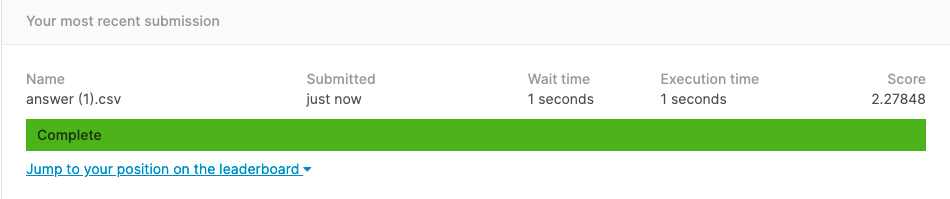